In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# More females than males visit Necter

In [18]:
import pandas as pd

dfs = pd.read_excel('/home/saket/BISC104-Tuesday-M.xlsx', sheet_name=[1, 2, 3, 4, 5, 6])

sheet_number_to_name = {1: 'Kylie_Bryan',
                        2: 'Andrew_Alyse',
                        3: 'Anika_Priyal',
                        4: 'Randy_Caroline',
                        5: 'Despina_Sophia',
                        6: 'Yijia_Chen'}

master_dfs = []
for key in dfs.keys():
    df = dfs[key]
    df['sheet_name'] = sheet_number_to_name[key]
    df['Time'] = df['Time'].str.replace(' ','') 
    df['start'] , df['end'] = df['Time'].str.split('-', 1).str
    master_dfs.append(df)

In [28]:
master_df = pd.concat(master_dfs)
master_df = master_df.drop(columns=['Time'])

In [29]:
master_df = master_df.sort_values(by=['start', 'Day'])

In [30]:
print(master_df.reset_index(drop=True).to_latex(index=False))

\begin{tabular}{lrrlll}
\toprule
       Day &  \# Males &  \# Females &      sheet\_name &  start &    end \\
\midrule
 Wednesday &       12 &         16 &    Anika\_Priyal &  06:00 &  06:15 \\
    Friday &        9 &         14 &  Randy\_Caroline &  11:00 &  11:25 \\
    Friday &        6 &          6 &    Andrew\_Alyse &  11:22 &  11:45 \\
  Thursday &       18 &         33 &    Andrew\_Alyse &  12:27 &  12:52 \\
    Friday &       11 &         14 &     Kylie\_Bryan &  12:40 &  13:00 \\
    Friday &        7 &         18 &  Despina\_Sophia &  14:15 &  14:35 \\
    Friday &        6 &         12 &      Yijia\_Chen &  15:00 &  15:15 \\
  Thursday &       23 &         29 &     Kylie\_Bryan &  15:20 &  15:45 \\
    Friday &       11 &         19 &      Yijia\_Chen &  15:30 &  15:45 \\
  Thursday &        9 &         21 &    Anika\_Priyal &  15:35 &  15:50 \\
    Friday &        8 &         24 &  Randy\_Caroline &  16:00 &  16:20 \\
\bottomrule
\end{tabular}



In [34]:
master_df = master_df.rename(columns={'# Males': 'Males', '# Females': 'Females'})

In [35]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=2)

In [38]:
df_molten = pd.melt(master_df, id_vars=['Day', 'sheet_name', 'start', 'end'], value_vars=['Males', 'Females'])

In [46]:
pd.to_datetime('06:00')

Timestamp('2018-09-04 06:00:00')

In [47]:
df_molten['start_time'] = pd.to_datetime(df_molten['start'])
df_molten['end_time'] = pd.to_datetime(df_molten['end'])

In [49]:
df_molten['delta'] = df_molten['end_time'] - df_molten['start_time']

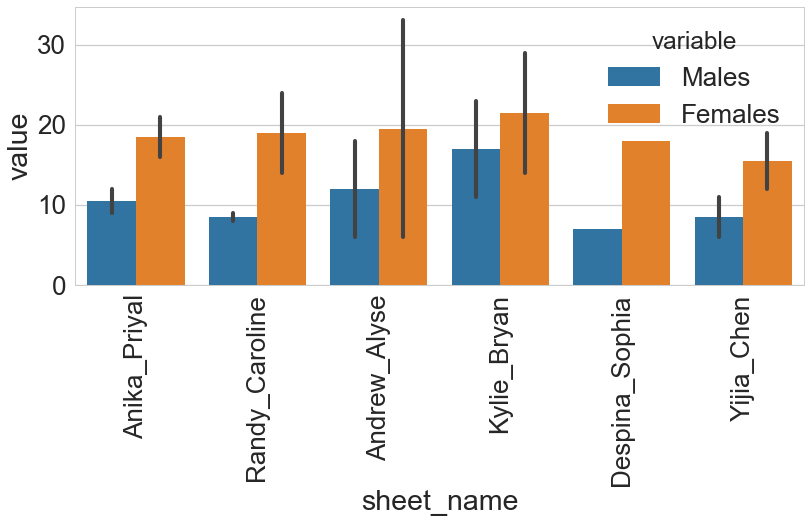

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_molten, hue='variable', x='sheet_name', y='value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('sheet_wise_plots.pdf')

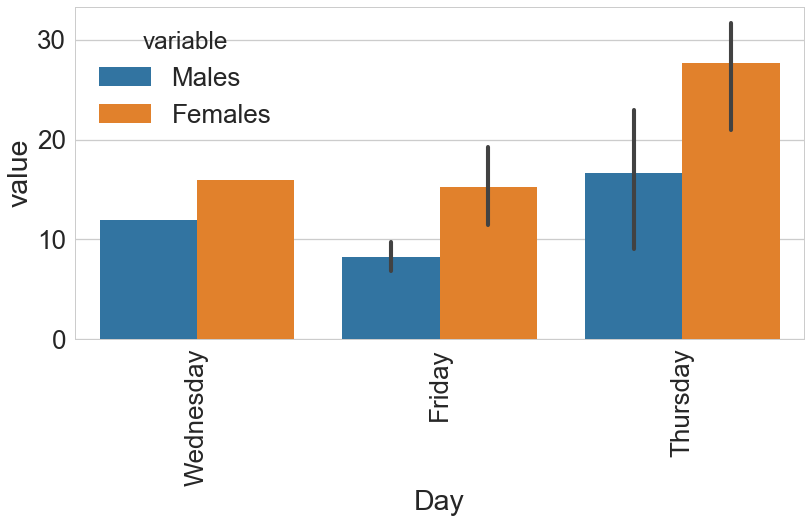

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_molten, hue='variable', x='Day', y='value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('day_wise_plots.pdf')

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_molten, hue='variable', x='Day', y='value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('day_wise_plots.pdf')

In [61]:
df_molten['delta_min'] = df_molten['delta'].dt.components.minutes

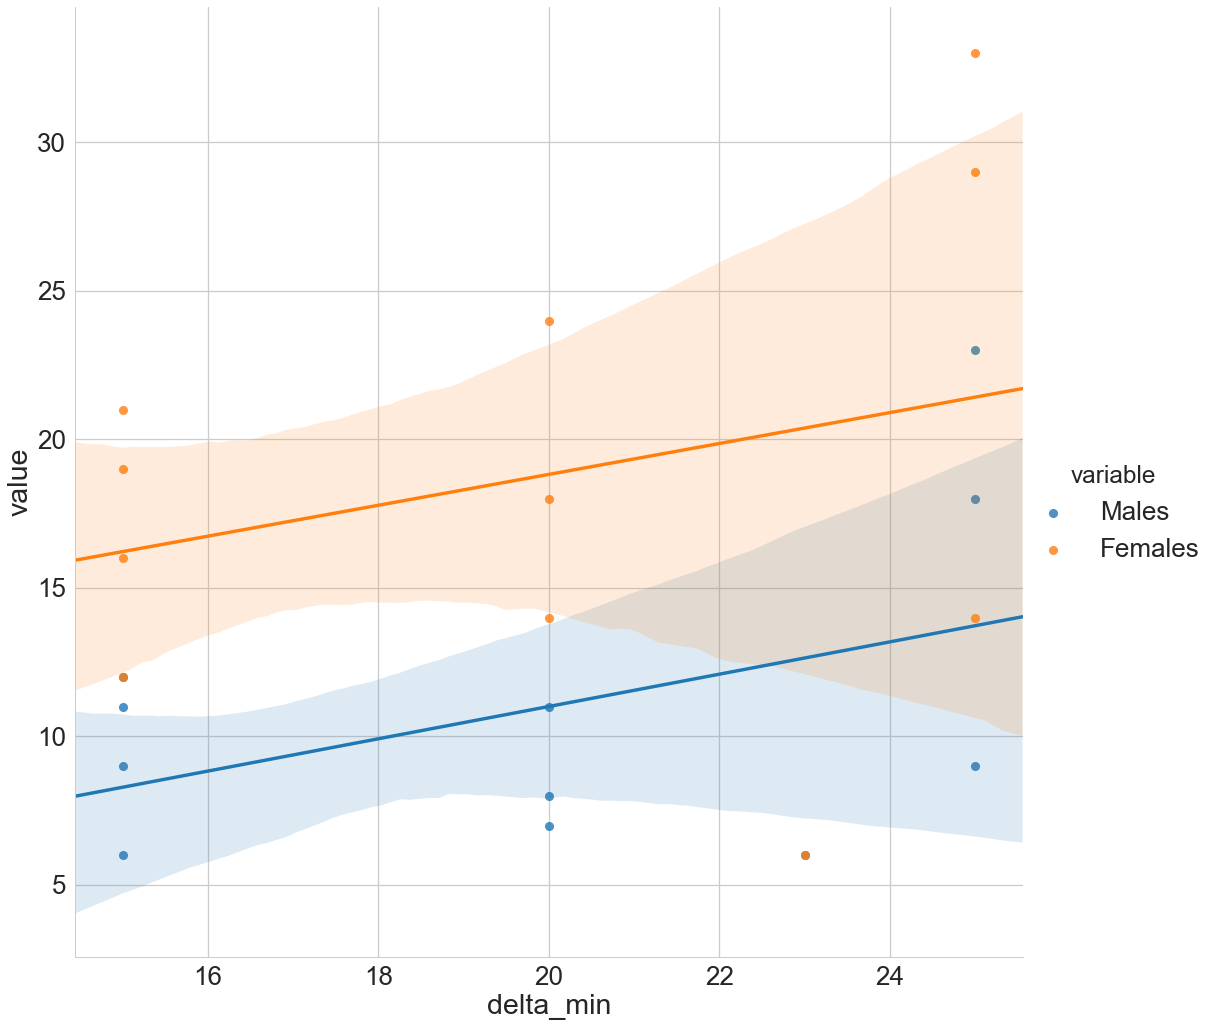

In [73]:
sns.lmplot(x="delta_min", y="value", hue="variable", data=df_molten, size=15)
plt.savefig('time_wise_plots.pdf')